In [476]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy

In [477]:
df=pd.read_csv('magicbricks_Ready_to_Move_Flats_50_Pages.csv')

In [478]:
df.head()

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,Bathroom 2,Sudarshan Paradise,65 Lac,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,Bathroom 3,Shapoorji Pallonji Sensorium,1.32 Cr,NaN,NaN
2,640.0,2 BHK,NaN,Bathroom 2,Forest Hills,37 Lac,7 out of 7,Ready to Move
3,894.0,2 BHK,NaN,Bathroom 2,Kundan Espacio,1.20 Cr,3 out of 13,Ready to Move
4,560.0,1 BHK,NaN,Bathroom 1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move


In [479]:
df = df.drop_duplicates()

In [480]:
df.shape

(1493, 8)

In [481]:
df.isnull().sum()

Area                 1
Property             0
Furnished Status    23
Bathroom             1
Society              5
Price                0
Floor               18
Status               2
dtype: int64

In [482]:
df.describe()

,Area
count,1492.000000
mean,601.656836
std,239.208653
min,87.000000
25%,438.000000
50%,562.000000
75%,702.000000
max,3096.000000


In [483]:
# so the property and price don't have missing value
df.dropna(axis=1)

,Property,Price
0,2 BHK,65 Lac
1,3 BHK,1.32 Cr
2,2 BHK,37 Lac
3,2 BHK,1.20 Cr
4,1 BHK,90 Lac
...,...,...
1495,2 BHK,80 Lac
1496,1 BHK,30 Lac
1497,1 BHK,40 Lac
1498,1 BHK,32 Lac


<Axes: >

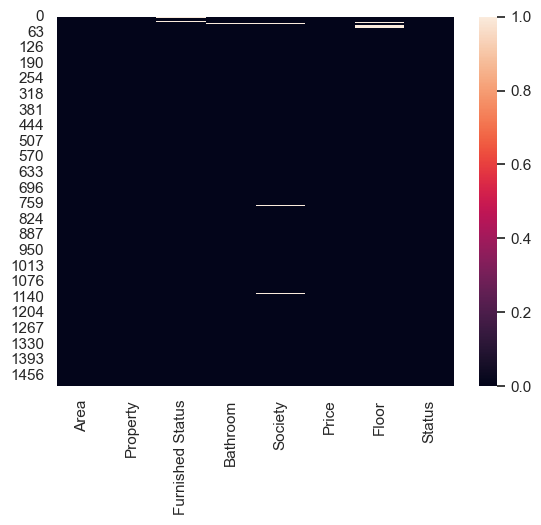

In [484]:
sns.heatmap(df.isnull())

In [485]:
df['Status']=df['Status'].fillna('Ready to Move')

In [486]:
df = df.dropna(subset=['Society'])

In [487]:
df['Bathroom']=df['Bathroom'].str.replace('Bathroom','')

In [488]:
df['Furnished Status']=df['Furnished Status'].fillna('Unfurnished')

In [489]:
df = df.dropna(subset=['Area'])

In [490]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,2,Sudarshan Paradise,65 Lac,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,3,Shapoorji Pallonji Sensorium,1.32 Cr,NaN,Ready to Move
2,640.0,2 BHK,Unfurnished,2,Forest Hills,37 Lac,7 out of 7,Ready to Move
3,894.0,2 BHK,Unfurnished,2,Kundan Espacio,1.20 Cr,3 out of 13,Ready to Move
4,560.0,1 BHK,Unfurnished,1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,2,Tropical Palms,80 Lac,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,1,Florida Minis,40 Lac,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move


In [491]:
def convert_cr_to_lac_clean(price):
    if isinstance(price, str):
        if 'Cr' in price:
            cr_value = float(price.split()[0])
            lac_value = cr_value * 100
            return f"{lac_value:.0f} Lac"
        elif 'Lac' in price:
            return price
    return price

df['Price'] = df['Price'].apply(convert_cr_to_lac_clean)

In [492]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,2,Sudarshan Paradise,65 Lac,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,3,Shapoorji Pallonji Sensorium,132 Lac,NaN,Ready to Move
2,640.0,2 BHK,Unfurnished,2,Forest Hills,37 Lac,7 out of 7,Ready to Move
3,894.0,2 BHK,Unfurnished,2,Kundan Espacio,120 Lac,3 out of 13,Ready to Move
4,560.0,1 BHK,Unfurnished,1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,2,Tropical Palms,80 Lac,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,1,Florida Minis,40 Lac,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move


In [493]:
df['Price'].isnull().sum()

0

In [494]:
df['Price'] = df['Price'].str.replace('Lac', '', regex=False).str.strip()


In [495]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,2,Sudarshan Paradise,65,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,3,Shapoorji Pallonji Sensorium,132,NaN,Ready to Move
2,640.0,2 BHK,Unfurnished,2,Forest Hills,37,7 out of 7,Ready to Move
3,894.0,2 BHK,Unfurnished,2,Kundan Espacio,120,3 out of 13,Ready to Move
4,560.0,1 BHK,Unfurnished,1,Tarangan Apartment,90,2 out of 3,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move


In [496]:
print(list(df['Price']))

['65', '132', '37', '120', '90', '185', '56', '32', '21.5', '28', '35', '35', '37', '65', '75', '55', '90', '30', '65', '48', '53.3', '12.7', '25.2', '29.5', '21', '85', '78', '42', '249', '55', '55', '80', '34.9', '37.4', '25.7', '27.2', '64.5', '52.5', '44.7', '16.5', '33.1', '30.1', '15.2', '53', '69.5', '58', '35', '25', '70', '31', '40', '40', '107', '46', '46', '60', '39', '72', '25', '20', '15', '56', '43', '31', '30', '80', '75', '25', '63', '125', '55', '40', '26', '80', '65', '30', '18.5', '24', '75', '55', '30', '13', '42', '33', '30', '52', '21', '95', '20', '22', '34', '40', '21', '44', '48', '50', '35', '12', '32', '55', '25', '45', '48', '17', '90', '42', '45', '60', '36.5', '22', '99', '35', '60', '59', '53', '35', '140', '38', '45', '65', '35', '66', '26', '36', '41.5', '54', '50', '75', '29', '17', '62', '57', '31', '94', '21', '28', '30', '60', '50', '11.8', '35', '70', '33', '44', '32', '40', '42', '52', '28', '65', '45', '22', '110', '50', '46', '42', '70', '58', '

In [497]:
df.isnull().sum()

Area                 0
Property             0
Furnished Status     0
Bathroom             0
Society              0
Price                0
Floor               18
Status               0
dtype: int64

In [498]:
df['Area']=df['Area'].astype(str)

In [499]:
df['Area']=df['Area'].str.replace('.0','')

In [500]:
df['Property']=df['Property'].str.replace('BHK','')

In [501]:
# First, split the 'Floor' column on ' out of '
df[['house_floor', 'building_floor']] = df['Floor'].str.extract(r'(\d+)\s+out of\s+(\d+)')
df=df.dropna(subset=['house_floor'])
df=df.dropna(subset=['building_floor'])
# Convert new columns to numeric
df['house_floor'] = df['house_floor'].astype(int)
df['building_floor'] = df['building_floor'].astype(int)

In [502]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status,house_floor,building_floor
2,640,2,Unfurnished,2,Forest Hills,37,7 out of 7,Ready to Move,7,7
3,894,2,Unfurnished,2,Kundan Espacio,120,3 out of 13,Ready to Move,3,13
4,560,1,Unfurnished,1,Tarangan Apartment,90,2 out of 3,Ready to Move,2,3
5,1061,3,Unfurnished,3,Ganga Serio,185,3 out of 22,Ready to Move,3,22
6,736,2,Unfurnished,2,Tamarind Park,56,7 out of 12,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move,1,7


In [503]:
df=df.rename(columns={"Area": "Area_sqft", "Property": "Property_BHK","house_floor":"House_floor",'Furnished Status':'Furnished_Status','building_floor':'Building_floor','Price':'Price_(lacks)'})

In [504]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price_(lacks),Floor,Status,House_floor,Building_floor
2,640,2,Unfurnished,2,Forest Hills,37,7 out of 7,Ready to Move,7,7
3,894,2,Unfurnished,2,Kundan Espacio,120,3 out of 13,Ready to Move,3,13
4,560,1,Unfurnished,1,Tarangan Apartment,90,2 out of 3,Ready to Move,2,3
5,1061,3,Unfurnished,3,Ganga Serio,185,3 out of 22,Ready to Move,3,22
6,736,2,Unfurnished,2,Tamarind Park,56,7 out of 12,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move,1,7


In [505]:
df=df.drop('Floor',axis=1)

In [506]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price_(lacks),Status,House_floor,Building_floor
2,640,2,Unfurnished,2,Forest Hills,37,Ready to Move,7,7
3,894,2,Unfurnished,2,Kundan Espacio,120,Ready to Move,3,13
4,560,1,Unfurnished,1,Tarangan Apartment,90,Ready to Move,2,3
5,1061,3,Unfurnished,3,Ganga Serio,185,Ready to Move,3,22
6,736,2,Unfurnished,2,Tamarind Park,56,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7


In [507]:
df.isna().sum()

Area_sqft           0
Property_BHK        0
Furnished_Status    0
Bathroom            0
Society             0
Price_(lacks)       0
Status              0
House_floor         0
Building_floor      0
dtype: int64

In [508]:
df.dtypes

Area_sqft           object
Property_BHK        object
Furnished_Status    object
Bathroom            object
Society             object
Price_(lacks)       object
Status              object
House_floor          int32
Building_floor       int32
dtype: object

In [509]:
df['Area_sqft']=df['Area_sqft'].astype(int)
df['Property_BHK']=df['Property_BHK'].astype(int)
df['Price_(lacks)']=df['Price_(lacks)'].astype(float)
df['Bathroom']=df['Bathroom'].astype(int)

In [510]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price_(lacks),Status,House_floor,Building_floor
2,640,2,Unfurnished,2,Forest Hills,37.0,Ready to Move,7,7
3,894,2,Unfurnished,2,Kundan Espacio,120.0,Ready to Move,3,13
4,560,1,Unfurnished,1,Tarangan Apartment,90.0,Ready to Move,2,3
5,1061,3,Unfurnished,3,Ganga Serio,185.0,Ready to Move,3,22
6,736,2,Unfurnished,2,Tamarind Park,56.0,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80.0,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30.0,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40.0,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32.0,Ready to Move,1,7


In [511]:
df.dtypes

Area_sqft             int32
Property_BHK          int32
Furnished_Status     object
Bathroom              int32
Society              object
Price_(lacks)       float64
Status               object
House_floor           int32
Building_floor        int32
dtype: object

In [512]:
def categorize_floor(row):
    house_floor = row['House_floor']
    building_floor = row['Building_floor']

    # Check for missing or invalid data
    if pd.isna(house_floor) or pd.isna(building_floor) or not isinstance(house_floor, (int, float)) or not isinstance(building_floor, (int, float)):
        return 'Unknown'

    # Ensure floor values are integers
    house_floor = int(house_floor)
    building_floor = int(building_floor)

    # Handle special cases like 'Ground' (assuming 0 if not numeric)
    if house_floor < 0 or building_floor <= 0:
        return 'Unknown'

    # Calculate thresholds for categorization
    top_threshold = building_floor * 0.75  # Top 25%
    low_threshold = building_floor * 0.25  # Bottom 25%

    # Categorize based on house floor position
    if house_floor >= top_threshold:
        return 'Top'
    elif house_floor >= low_threshold:
        return 'Mid'
    else:
        return 'Low'

# Apply the categorization function to create a new column
df['Floor_Category'] = df.apply(categorize_floor, axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('magicbricks_Ready_to_Move_Flats_with_Floor_Category_large.csv', index=False)

# Display the first few rows to verify (optional, comment out for large datasets to save memory)
print(df[['House_floor', 'Building_floor', 'Floor_Category']].head(10))

    House_floor  Building_floor Floor_Category
2             7               7            Top
3             3              13            Low
4             2               3            Mid
5             3              22            Low
6             7              12            Mid
7            12              12            Top
8             5               9            Mid
9             1               3            Mid
10            8               9            Top
11            2              11            Low


In [513]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price_(lacks),Status,House_floor,Building_floor,Floor_Category
2,640,2,Unfurnished,2,Forest Hills,37.0,Ready to Move,7,7,Top
3,894,2,Unfurnished,2,Kundan Espacio,120.0,Ready to Move,3,13,Low
4,560,1,Unfurnished,1,Tarangan Apartment,90.0,Ready to Move,2,3,Mid
5,1061,3,Unfurnished,3,Ganga Serio,185.0,Ready to Move,3,22,Low
6,736,2,Unfurnished,2,Tamarind Park,56.0,Ready to Move,7,12,Mid
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80.0,Ready to Move,1,15,Low
1496,403,1,Semi-Furnished,1,Lotus Apartment,30.0,Ready to Move,3,4,Top
1497,454,1,Unfurnished,1,Florida Minis,40.0,Ready to Move,2,5,Mid
1498,491,1,Unfurnished,1,Swaraj Complex,32.0,Ready to Move,1,7,Low


In [514]:
display(df.describe())

,Area_sqft,Property_BHK,Bathroom,Price_(lacks),House_floor,Building_floor
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,596.977003,1.659233,1.645296,53.855261,4.023693,7.710801
std,233.563556,0.671374,0.641681,42.499781,2.782842,4.404336
min,87.000000,0.000000,1.000000,10.000000,1.000000,1.000000
25%,437.000000,1.000000,1.000000,32.000000,2.000000,5.000000
50%,558.000000,2.000000,2.000000,45.000000,3.000000,7.000000
75%,698.000000,2.000000,2.000000,62.000000,5.500000,11.000000
max,3096.000000,6.000000,6.000000,600.000000,18.000000,80.000000


In [515]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Univariate Analysis : Non Visual

In [517]:
# Dividing numerical and categorical dataframes.
numerical_df = df.select_dtypes(include=['int64','float64','int32'])
cat_df =df.select_dtypes(include='object')

In [518]:
cat_df

,Furnished_Status,Society,Status,Floor_Category
2,Unfurnished,Forest Hills,Ready to Move,Top
3,Unfurnished,Kundan Espacio,Ready to Move,Low
4,Unfurnished,Tarangan Apartment,Ready to Move,Mid
5,Unfurnished,Ganga Serio,Ready to Move,Low
6,Unfurnished,Tamarind Park,Ready to Move,Mid
...,...,...,...,...
1495,Semi-Furnished,Tropical Palms,Ready to Move,Low
1496,Semi-Furnished,Lotus Apartment,Ready to Move,Top
1497,Unfurnished,Florida Minis,Ready to Move,Mid
1498,Unfurnished,Swaraj Complex,Ready to Move,Low


In [519]:
numerical_df

,Area_sqft,Property_BHK,Bathroom,Price_(lacks),House_floor,Building_floor
2,640,2,2,37.0,7,7
3,894,2,2,120.0,3,13
4,560,1,1,90.0,2,3
5,1061,3,3,185.0,3,22
6,736,2,2,56.0,7,12
...,...,...,...,...,...,...
1495,723,2,2,80.0,1,15
1496,403,1,1,30.0,3,4
1497,454,1,1,40.0,2,5
1498,491,1,1,32.0,1,7


In [520]:
numerical_df.columns

Index(['Area_sqft', 'Property_BHK', 'Bathroom', 'Price_(lacks)', 'House_floor',
       'Building_floor'],
      dtype='object')

In [521]:
cat_df.columns

Index(['Furnished_Status', 'Society', 'Status', 'Floor_Category'], dtype='object')

In [522]:
# Define a function to find unique, number of unique values, value counts.
def cat_univariate_analysis(df):
    for col in df:
        print("-"*10,df[col],"-"*10)
        print(df[col].agg(['count','nunique','unique']))
        print('Value counts : \n',df[col].value_counts())
        print()


In [523]:
cat_univariate_analysis(cat_df)

---------- 2          Unfurnished
3          Unfurnished
4          Unfurnished
5          Unfurnished
6          Unfurnished
             ...      
1495    Semi-Furnished
1496    Semi-Furnished
1497       Unfurnished
1498       Unfurnished
1499       Unfurnished
Name: Furnished_Status, Length: 1435, dtype: object ----------
count                                          1435
nunique                                           3
unique     [Unfurnished, Semi-Furnished, Furnished]
Name: Furnished_Status, dtype: object
Value counts : 
 Furnished_Status
Unfurnished       795
Semi-Furnished    452
Furnished         188
Name: count, dtype: int64

---------- 2             Forest Hills
3           Kundan Espacio
4       Tarangan Apartment
5              Ganga Serio
6            Tamarind Park
               ...        
1495        Tropical Palms
1496       Lotus Apartment
1497         Florida Minis
1498        Swaraj Complex
1499        Satyam Heights
Name: Society, Length: 1435, dtype: object -

In [524]:
numerical_df.describe()

,Area_sqft,Property_BHK,Bathroom,Price_(lacks),House_floor,Building_floor
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,596.977003,1.659233,1.645296,53.855261,4.023693,7.710801
std,233.563556,0.671374,0.641681,42.499781,2.782842,4.404336
min,87.000000,0.000000,1.000000,10.000000,1.000000,1.000000
25%,437.000000,1.000000,1.000000,32.000000,2.000000,5.000000
50%,558.000000,2.000000,2.000000,45.000000,3.000000,7.000000
75%,698.000000,2.000000,2.000000,62.000000,5.500000,11.000000
max,3096.000000,6.000000,6.000000,600.000000,18.000000,80.000000


# Univariate - Visual Analysis of Numerical Columns

In [526]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [527]:
numerical_df.columns

Index(['Area_sqft', 'Property_BHK', 'Bathroom', 'Price_(lacks)', 'House_floor',
       'Building_floor'],
      dtype='object')

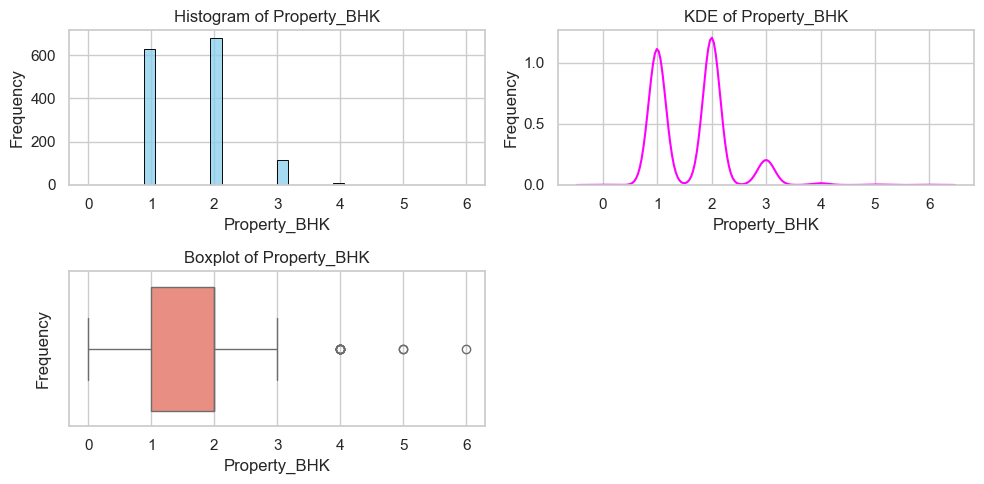

In [528]:
plot_numerical_analysis(numerical_df,'Property_BHK')

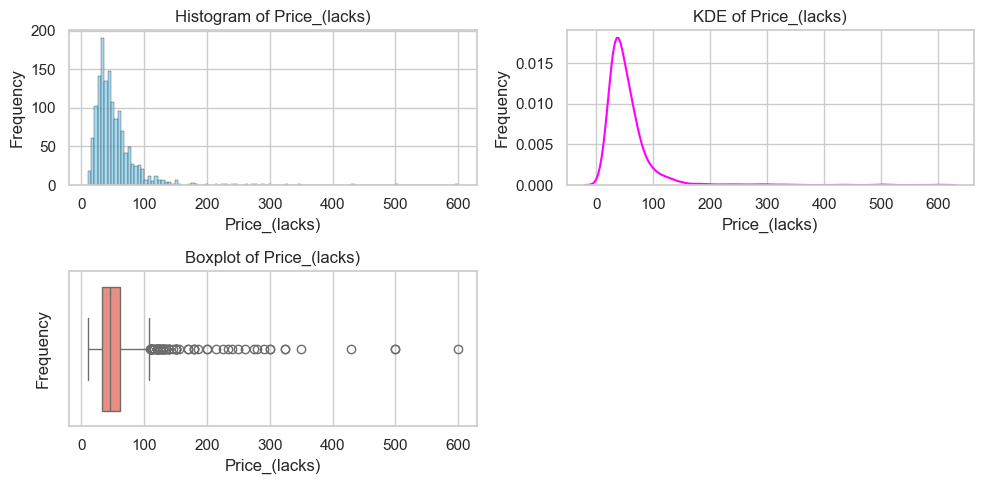

In [529]:
plot_numerical_analysis(numerical_df,'Price_(lacks)')

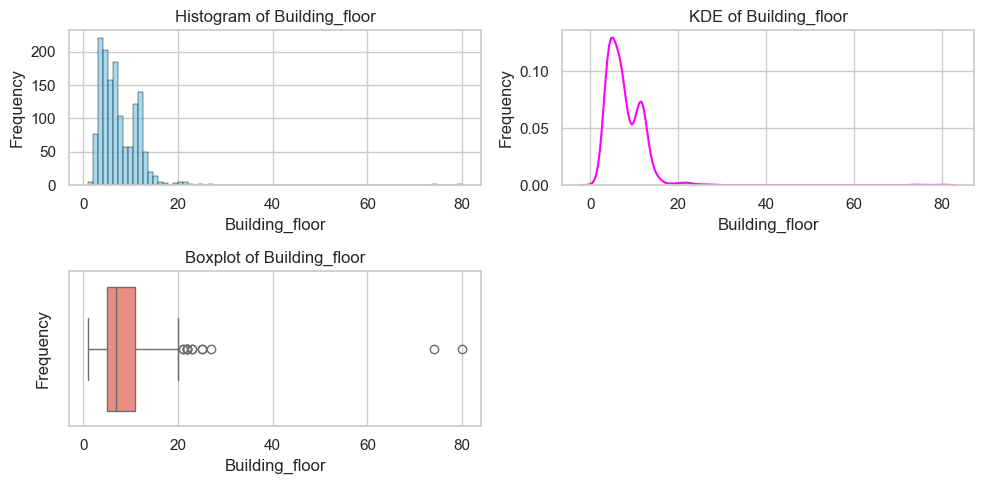

In [530]:
plot_numerical_analysis(numerical_df,'Building_floor')

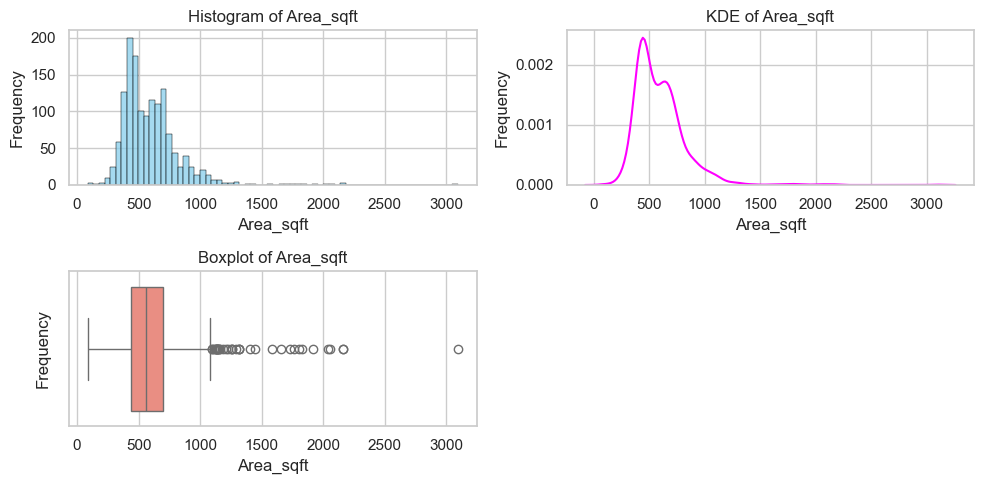

In [531]:
plot_numerical_analysis(numerical_df,'Area_sqft')

# Treating Outliers

Area_sqft            Axes(0.125,0.712609;0.352273x0.167391)
Property_BHK      Axes(0.547727,0.712609;0.352273x0.167391)
Bathroom             Axes(0.125,0.511739;0.352273x0.167391)
Price_(lacks)     Axes(0.547727,0.511739;0.352273x0.167391)
House_floor           Axes(0.125,0.31087;0.352273x0.167391)
Building_floor     Axes(0.547727,0.31087;0.352273x0.167391)
dtype: object

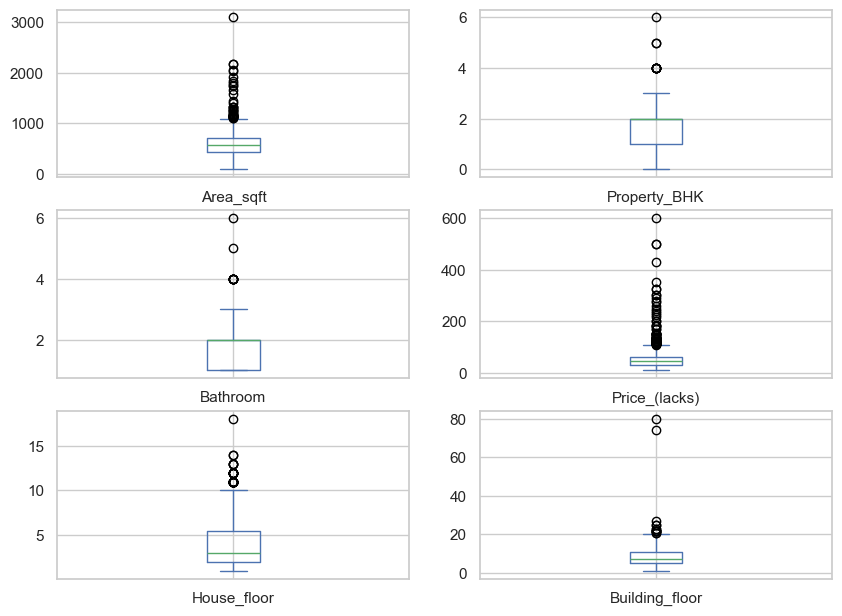

In [533]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

In [534]:
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mean_val = df[(df[column] >= low) & (df[column] <= high)][column].mean()
    df[column] = df[column].apply(lambda x: mean_val if x < low or x > high else x)
    return df


In [535]:
col=['Bathroom','Property_BHK','Building_floor',]
for column in col:
  df = replace_outliers_with_mean(df,column)

In [536]:
df['Property_BHK']=df['Property_BHK'].astype(int)
df['Price_(lacks)']=df['Price_(lacks)'].astype(float)
df['Bathroom']=df['Bathroom'].astype(int)
df['Building_floor']=df['Building_floor'].astype(int)

Area_sqft            Axes(0.125,0.712609;0.352273x0.167391)
Property_BHK      Axes(0.547727,0.712609;0.352273x0.167391)
Bathroom             Axes(0.125,0.511739;0.352273x0.167391)
Price_(lacks)     Axes(0.547727,0.511739;0.352273x0.167391)
House_floor           Axes(0.125,0.31087;0.352273x0.167391)
Building_floor     Axes(0.547727,0.31087;0.352273x0.167391)
dtype: object

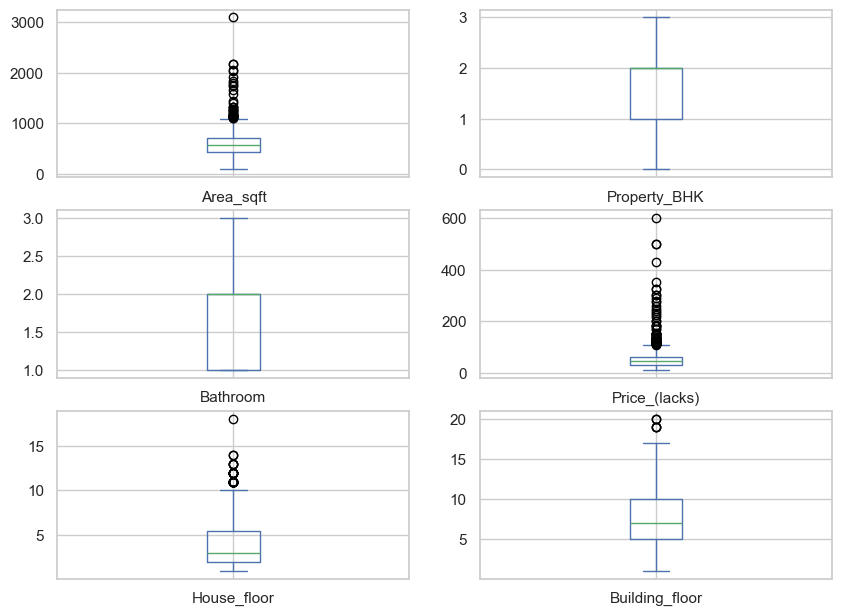

In [537]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

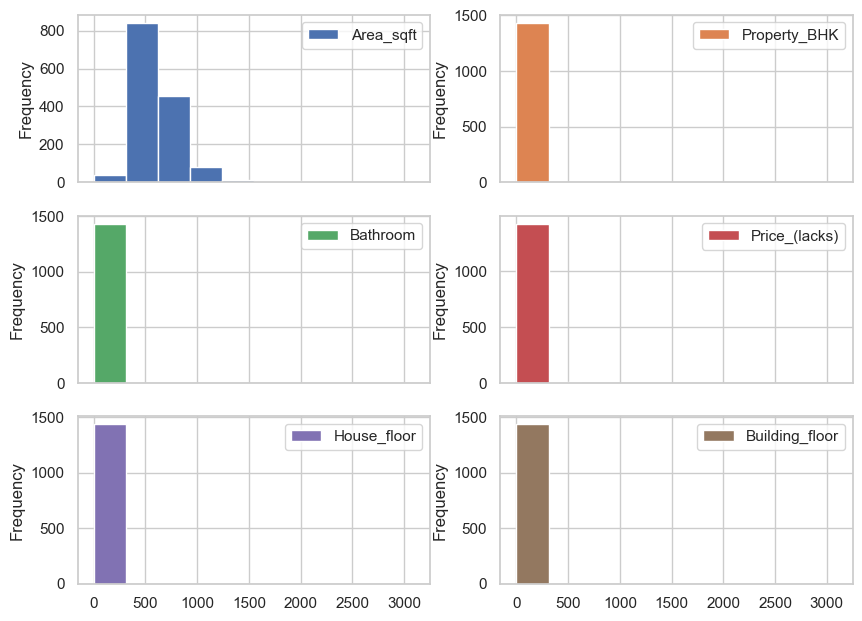

In [538]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

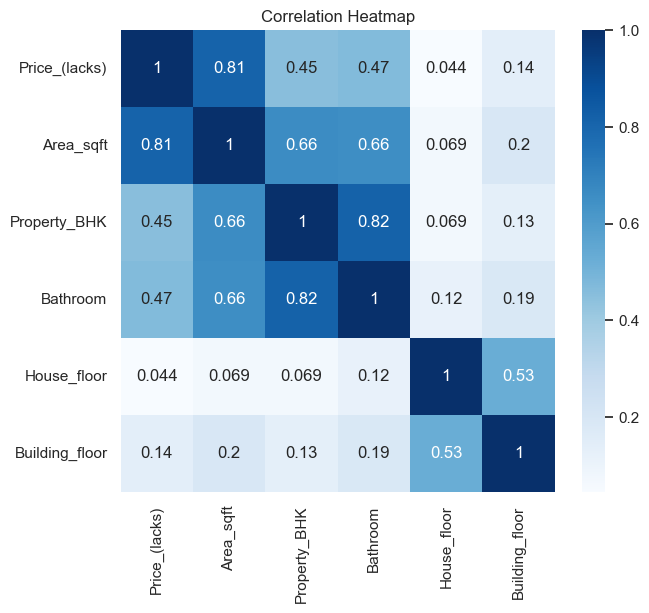

In [539]:
plt.figure(figsize=(7, 6))
sns.heatmap(df[['Price_(lacks)', 'Area_sqft', 'Property_BHK', 'Bathroom', 'House_floor', 'Building_floor']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

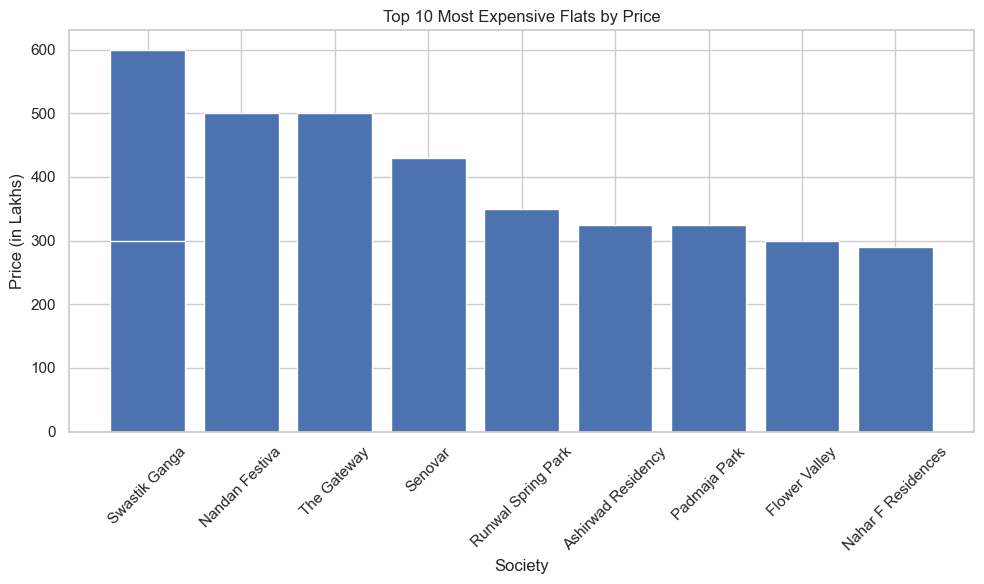

In [540]:
import matplotlib.pyplot as plt

# Get top 10 most expensive flats
top_10_flats = df[['Society', 'Price_(lacks)']].sort_values(by='Price_(lacks)', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_flats['Society'], top_10_flats['Price_(lacks)'])
plt.title("Top 10 Most Expensive Flats by Price")
plt.xlabel("Society")
plt.ylabel("Price (in Lakhs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [541]:
df[df['Society'] == 'Swaraj Complex']

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price_(lacks),Status,House_floor,Building_floor,Floor_Category
1498,491,1,Unfurnished,1,Swaraj Complex,32.0,Ready to Move,1,7,Low


In [542]:
df['Price_(lacks)'].max()

600.0

In [543]:
df[df['Price_(lacks)'] == df['Price_(lacks)'].max()]['Society']


848    Swastik Ganga
Name: Society, dtype: object

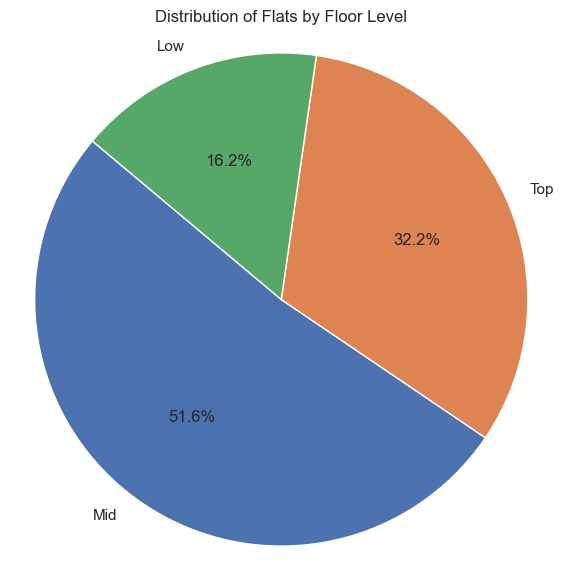

In [544]:
import matplotlib.pyplot as plt

# Count each floor category
floor_counts = df['Floor_Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flats by Floor Level')
plt.axis('equal')  # Equal aspect ratio to make the pie circular
plt.show()

<Axes: xlabel='Price_(lacks)', ylabel='Property_BHK'>

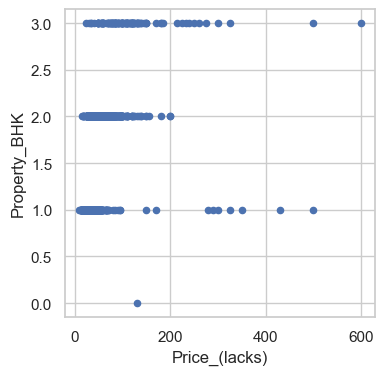

In [545]:
df.plot(kind='scatter', x='Price_(lacks)', y='Property_BHK', figsize=(4, 4))

<Axes: xlabel='Price_(lacks)', ylabel='House_floor'>

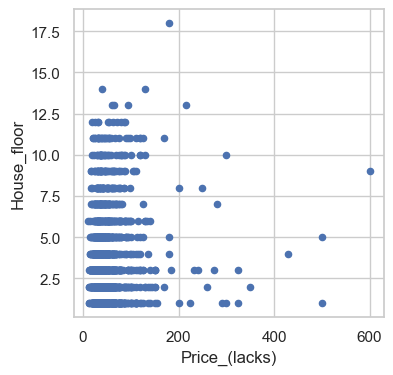

In [546]:
df.plot(kind='scatter', x='Price_(lacks)', y='House_floor', figsize=(4, 4))

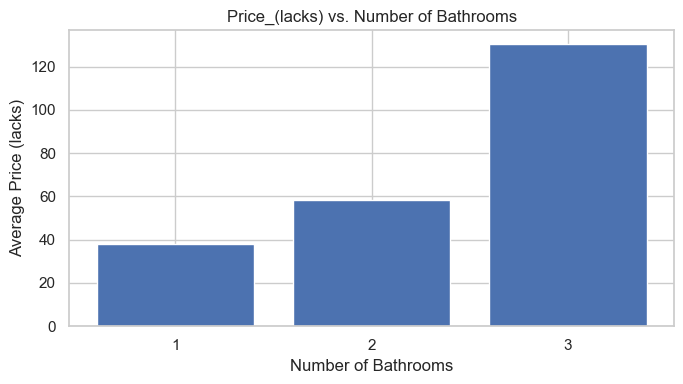

In [547]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(7, 4))
plt.bar(bathroom_price.index, bathroom_price.values)
plt.title('Price_(lacks) vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price (lacks)')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # 🔥 remove .0 from x-axis
plt.tight_layout()
plt.show()


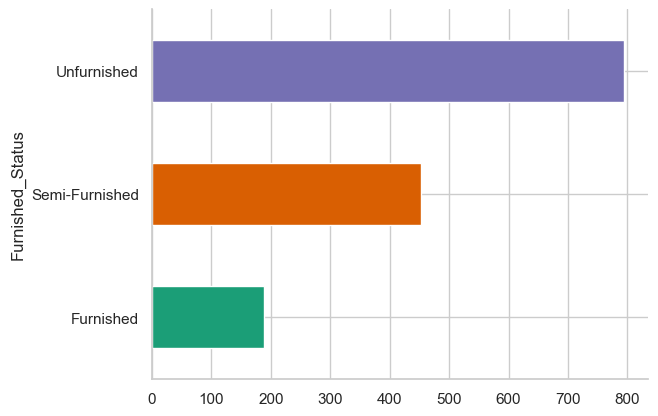

In [548]:
# @title Furnished_Status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Furnished_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

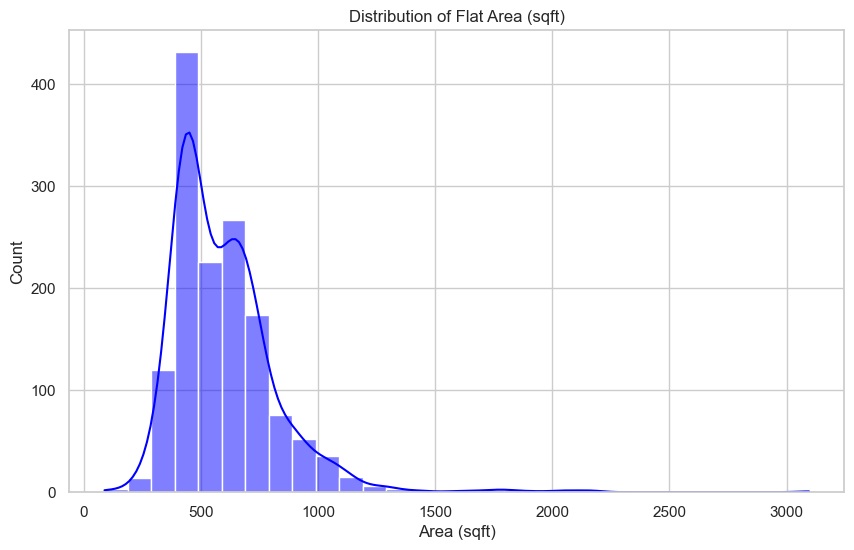

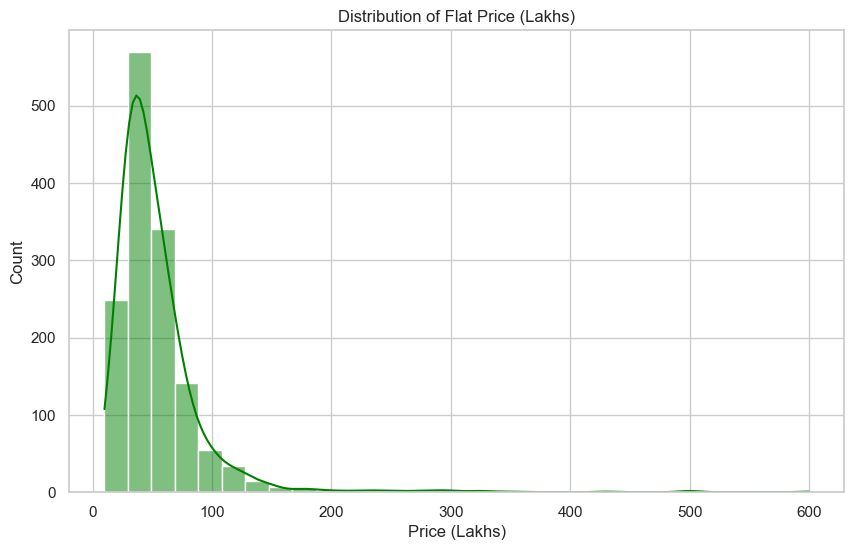

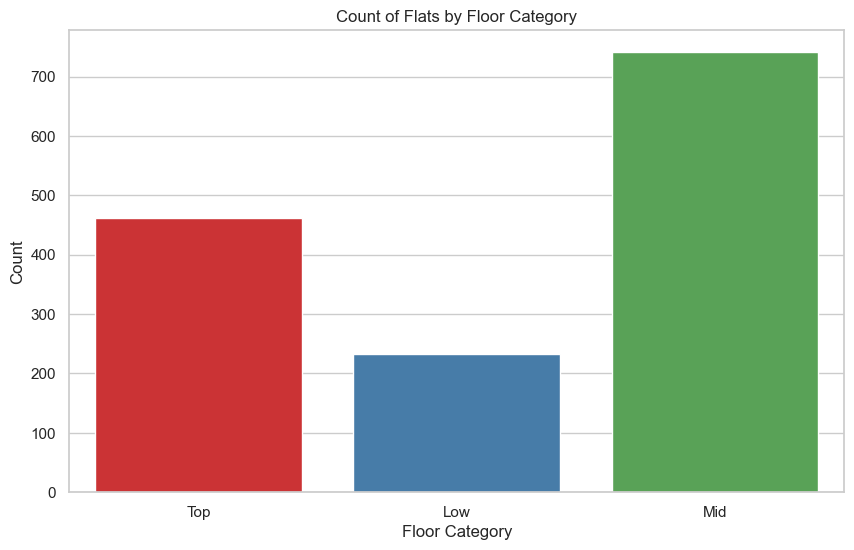

In [549]:
sns.set(style="whitegrid")

# 1. Histogram of Area
plt.figure(figsize=(10, 6))
sns.histplot(df['Area_sqft'], bins=30, kde=True, color='blue')
plt.title('Distribution of Flat Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Count')
plt.show()

# 2. Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_(lacks)'], bins=30, kde=True, color='green')
plt.title('Distribution of Flat Price (Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Floor_Category', data=df, palette='Set1')
plt.title('Count of Flats by Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Count')
plt.show()

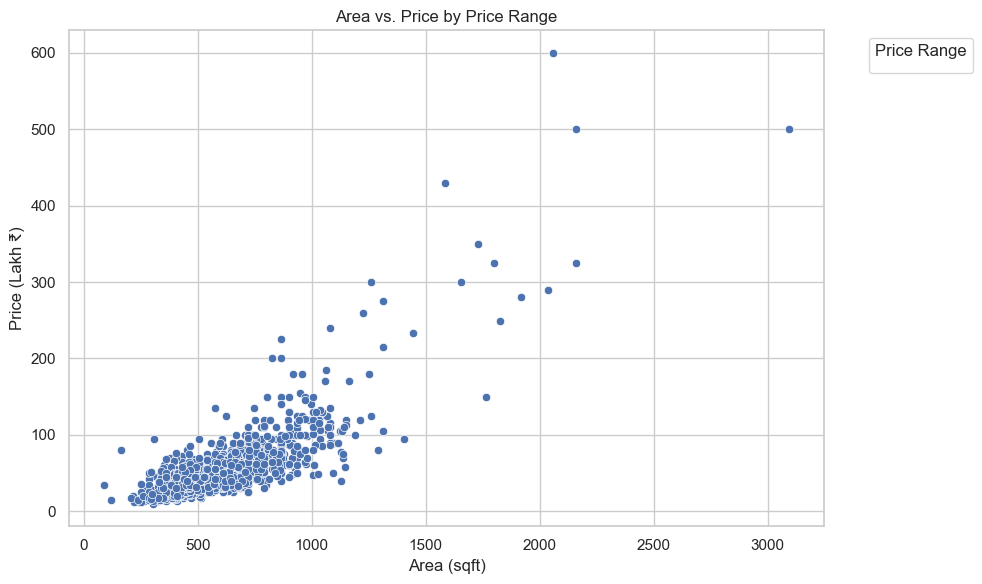

In [550]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_sqft', y='Price_(lacks)', palette='coolwarm')
plt.title('Area vs. Price by Price Range')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (Lakh ₹)')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [633]:
df.shape

(1435, 10)

In [635]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price_(lacks),Status,House_floor,Building_floor,Floor_Category
2,640,2,Unfurnished,2,Forest Hills,37.0,Ready to Move,7,7,Top
3,894,2,Unfurnished,2,Kundan Espacio,120.0,Ready to Move,3,13,Low
4,560,1,Unfurnished,1,Tarangan Apartment,90.0,Ready to Move,2,3,Mid
5,1061,3,Unfurnished,3,Ganga Serio,185.0,Ready to Move,3,7,Low
6,736,2,Unfurnished,2,Tamarind Park,56.0,Ready to Move,7,12,Mid
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80.0,Ready to Move,1,15,Low
1496,403,1,Semi-Furnished,1,Lotus Apartment,30.0,Ready to Move,3,4,Top
1497,454,1,Unfurnished,1,Florida Minis,40.0,Ready to Move,2,5,Mid
1498,491,1,Unfurnished,1,Swaraj Complex,32.0,Ready to Move,1,7,Low
